![title](./images/vader_1.jpg)

# En este ejercicio, enseñaremos sentimientos al ordenador
<br>

 <div class="alert alert-block alert-info">
El <strong>sentiment analysis</strong> se usa sobre todo en el ámbito de las redes sociales, y el marketing digital.
</div>

<br>

## Contenidos ##
- ### Librería vader de analisis de sentimientos.
- ### Ejemplo de frases positivas, negativas y neutras.
- ### Ejemplo de traducción a otros idiomas
- ### Analisis del hashtag de twitter
- ### Resultado y conclusión

Vamos a medir la intensidad del sentimiento usando la librería vader. https://github.com/cjhutto/vaderSentiment

Nos va a devolver un diccionario con la polarización de sentimientos (el polarity score).
 - neg: Negative
 - neu: Neutral
 - pos: Positive
 - compound: Compound (i.e. aggregated score)

In [1]:
# Definimos una gráfica
import matplotlib.pyplot as plt

def mostrar_grafica(puntuacion):
    plt.bar(range(len(puntuacion)), list(puntuacion.values()), align='center')
    plt.xticks(range(len(puntuacion)), list(puntuacion.keys()))
    plt.show()


Probamos con una frase neutral

,compound,neg,neu,pos
0,0.0,0.0,1.0,0.0


"Let's get work. Really"

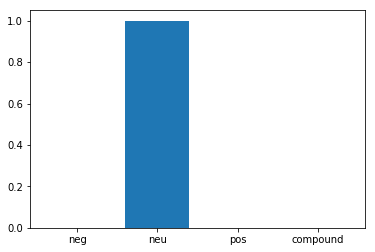

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from IPython.core.display import HTML 

FRASE="Let's get work. Really"

puntuacion = SentimentIntensityAnalyzer().polarity_scores(FRASE)

display(pd.DataFrame([puntuacion]), FRASE)

mostrar_grafica(puntuacion)


Una frase positiva

,compound,neg,neu,pos
0,0.5719,0.0,0.448,0.552


'This tea is excellent'

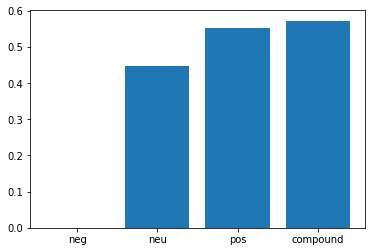

In [3]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from IPython.core.display import HTML 

FRASE="This tea is excellent"

puntuacion = SentimentIntensityAnalyzer().polarity_scores(FRASE)

display(pd.DataFrame([puntuacion]), FRASE)

mostrar_grafica(puntuacion)



Y una frase negativa

,compound,neg,neu,pos
0,-0.6808,0.535,0.465,0.0


'The traffic is a living hell.'

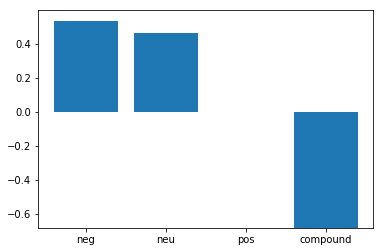

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from IPython.core.display import HTML 

FRASE="The traffic is a living hell."

puntuacion = SentimentIntensityAnalyzer().polarity_scores(FRASE)

display(pd.DataFrame([puntuacion]), FRASE)

mostrar_grafica(puntuacion)


### Ejemplo de traducción a otros idiomas

Hay que traducir la frase, antes de pasársela a vader.

Se ha estropeado la maldita máquina, joder joder joder.  se traduce por :  The damn machine is screwed up, fuck fuck fuck.


,compound,neg,neu,pos
0,-0.9468,0.804,0.196,0.0


'The damn machine is screwed up, fuck fuck fuck.'

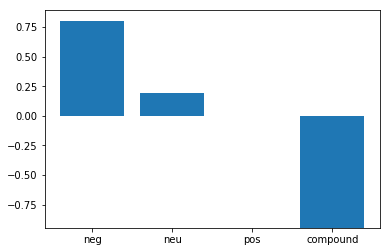

In [5]:
import requests
import json
import string

frase = "Se ha estropeado la maldita máquina, joder joder joder."

from_lang = 'es'
to_lang = 'en'
api_url = "http://mymemory.translated.net/api/get?q={}&langpair={}|{}".format(frase, from_lang, to_lang)

hdrs = { 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
        'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
        'Accept-Encoding': 'none',
        'Accept-Language': 'en-US,en;q=0.8',
        'Connection': 'keep-alive'}

response = requests.get(api_url, headers=hdrs)
response_json = json.loads(response.text)
translation = response_json["responseData"]["translatedText"]
print(frase, " se traduce por : ",translation)

sentence = translation

analyzer = SentimentIntensityAnalyzer()
puntuacion = analyzer.polarity_scores(sentence)

display(pd.DataFrame([puntuacion]), sentence)

mostrar_grafica(puntuacion)



### Sentiment analisys del hashtag de twitter

Vamos a descargarnos los tweets de un hashtag determinado, y le vamos a pasar por vader.


La idea es detectar los tweets negativos sobre algo.


El hashtag es ....

In [6]:

import tweepy
import csv
import pandas as pd
from datetime import date, timedelta

####
###### Nos conectamos a tweeter 
#(para usar esto hay que arreglar las variables con los token de conexion), y descomentar el guardado a disco.

import tweepy
import csv
import pandas as pd
from datetime import date, timedelta

#### Credenciales de acceso a twitter
consumer_key=""
consumer_secret=""
access_token=""
access_token_secret=""

hashtag="Telefonica"

# Quitamos la primera letra de las variables, y ponemos un guión para despistar a los parser
consumer_key    = 'hmFJIxaV0HqCuKVZc8iZL65sJ'
consumer_secret = 'leDBguzuUDqd4v2YwKf9cYywWBWEDX4XV341HVdLHC18n1C7kP'
access_token    = '792058678581026816-ZZk5lNrzMcLJdHRrRLMn6LIksQLDZTi'
access_token_secret   = 'zskKIFghdWezAgpChHLGrVX6OtZPBOmSOvG1tPMtWlK6b'

print(" Nos conectamos a twitter" )


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

options = " -filter:retweets"
array = []
full = []
i=0 # Solo para log
try:
    # Pedimos datos al api
    for tweet in tweepy.Cursor(api.search , count=100,q=hashtag + options, lang="en", tweet_mode="extended").items(5000) :
        array.append({"hashtag" : hashtag  , 
                      "tweet" : tweet.full_text,
                      "link" : "https://twitter.com/"+ tweet._json["user"]["screen_name"] + "/status/" + tweet.id_str ,
                      "retweet_count" : tweet.retweet_count ,
                      "favorite_count": tweet.favorite_count
                     })
        i = i + 1
        if  i % 1000 == 0  : print ( "Tweets descargados : " , i)
            
            
        
    # Guardar a disco    
    df = pd.DataFrame(array)
    
    ### Descomentar para guardar a disco
    df.to_csv('datasets/tweeter.csv',index=False)
    tweets = df 

    print(" Acabamos de descargarnos",df.size,"tweets de " , hashtag )
    df.head(5)

except Exception as e:
    print("Excepcion : " , str(e))


 Nos conectamos a twitter
 Acabamos de descargarnos 3500 tweets de  Telefonica


In [7]:
df.tail()

,favorite_count,hashtag,link,retweet_count,tweet
695,0,Telefonica,https://twitter.com/JCPinEastScot/status/10395...,0,Retail Advisor @O2Careers #Dunfermline\nApply/...
696,5,Telefonica,https://twitter.com/vrbenjamins/status/1039522...,1,Big Data &amp; AI for Social Good (in German)....
697,0,Telefonica,https://twitter.com/telefonicab2b/status/10395...,0,"By 2020, more than 60% of #enterprises will ha..."
698,1,Telefonica,https://twitter.com/mhacheB/status/10395134419...,0,Telefonica Spain manages to increase IT produc...
699,0,Telefonica,https://twitter.com/GinaMclean_O2UK/status/103...,0,Do you have a passion to inspire others? Fort ...


In [8]:
#########################################
### Cargamos el DataFrame, desde un csv.
### Por si no los hemos descargado
#########################################
import pandas as pd
tweets = pd.read_csv('datasets/tweeter.csv',encoding = 'utf8')
tweets.head()


,favorite_count,hashtag,link,retweet_count,tweet
0,0,Telefonica,https://twitter.com/patent_analysis/status/104...,0,"""Telefónica refreshes startup program to focus..."
1,0,Telefonica,https://twitter.com/caloique/status/1043178875...,0,There is few days left to close our call to jo...
2,1,Telefonica,https://twitter.com/Mikasa_Chilosa/status/1043...,0,@radiorahqueen Yeaaaah I’m not feeling it as m...
3,0,Telefonica,https://twitter.com/EideBaillyTech/status/1043...,0,Technology can help you engage your customers ...
4,0,Telefonica,https://twitter.com/O2Careers/status/104316851...,0,The benefits we give our people give them that...


Ahora que tenemos los tweets en un dataframe, 

por cada tweet, vamos llamando a vader, para sacar las puntuaciones.

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

array_puntuaciones = []
for index, row in tweets.iterrows():
    puntuacion = SentimentIntensityAnalyzer().polarity_scores(row.tweet.replace("#",""))
    array_puntuaciones.append ( puntuacion)


df = pd.DataFrame(array_puntuaciones)
df["hashtag"]     = tweets["hashtag"]
df["tweet"]       = tweets["tweet"]
df["link"]        = tweets["link"]
df["retweets"]    = tweets["retweet_count"]
df["favorites"]   = tweets["favorite_count"]


df.head()

,compound,neg,neu,pos,hashtag,tweet,link,retweets,favorites
0,0.7708,0.000,0.816,0.184,Telefonica,"""Telefónica refreshes startup program to focus...",https://twitter.com/patent_analysis/status/104...,0,0
1,0.7500,0.000,0.841,0.159,Telefonica,There is few days left to close our call to jo...,https://twitter.com/caloique/status/1043178875...,0,0
2,-0.0951,0.132,0.868,0.000,Telefonica,@radiorahqueen Yeaaaah I’m not feeling it as m...,https://twitter.com/Mikasa_Chilosa/status/1043...,0,1
3,0.8979,0.000,0.719,0.281,Telefonica,Technology can help you engage your customers ...,https://twitter.com/EideBaillyTech/status/1043...,0,0
4,0.3818,0.000,0.833,0.167,Telefonica,The benefits we give our people give them that...,https://twitter.com/O2Careers/status/104316851...,0,0


In [10]:
# Esta clase es solp para mostrar el tweet por pantalla

import requests
class Tweet(object):
    def __init__(self, s, embed_str=False):
        if not embed_str:
            # Use Twitter's oEmbed API
            # https://dev.twitter.com/web/embedded-tweets
            api = 'https://publish.twitter.com/oembed?url={}'.format(s)
            response = requests.get(api)
            self.text = response.json()["html"]
        else:
            self.text = s

    def _repr_html_(self):
        return self.text

In [11]:
from IPython.display import Image
from IPython.core.display import HTML 

s = f"""<h3>Los tweets mas positivos son : </h3>"""
display(HTML(s))

# Cogemos los valores mas positivos
minitabla = df.sort_values(by=['pos'],ascending = False ).head(3)[["compound" ,"neg" ,"neu" ,"pos" ,"tweet", "link"]]

display(minitabla)

for (i, fila) in minitabla.iterrows() : 
    display(Tweet(fila.link)) 




,compound,neg,neu,pos,tweet,link
249,0.8309,0.0,0.278,0.722,Great Wayra Proud !! https://t.co/HcHvNtmNYt,https://twitter.com/m_delascasas/status/104270...
677,0.8997,0.0,0.450,0.550,@vfiorese_ @MSF @Wayra @Telefonica @vivobr Wow...,https://twitter.com/jdelacruz_IoT/status/10396...
650,0.7184,0.0,0.500,0.500,Artificial intelligence for good @telefonica #...,https://twitter.com/cardenosa/status/103982531...


In [12]:
from IPython.display import Image
from IPython.core.display import HTML 

s = f"""<h3>Los tweets mas negativos son : </h3>"""
display(HTML(s))

# Cogemos los valores mas neg
minitabla = df.sort_values(by=['neg'],ascending = False ).head(5)[["compound" ,"neg" ,"neu" ,"pos" ,"tweet", "link"]]

display(minitabla)

for (i, fila) in minitabla.iterrows() : 
    display(Tweet(fila.link)) 



,compound,neg,neu,pos,tweet,link
662,-0.6289,0.508,0.492,0.000,$TEF #TELEFONICA #DANGER TicTac https://t.co/Q...,https://twitter.com/jtradercs/status/103977747...
489,-0.5267,0.423,0.577,0.000,Telefonica Stops Threats to Network with Oracl...,https://twitter.com/Ewaz_Nazari1/status/104069...
355,-0.1860,0.330,0.451,0.219,No PPV TV then NO champions lge is Spain. htt...,https://twitter.com/robostarred/status/1042098...
585,-0.5574,0.295,0.705,0.000,Telefonica Chile mitigating Cloud Disruption r...,https://twitter.com/MarcoPfuhl/status/10401134...
347,-0.2960,0.268,0.732,0.000,@ImDataScientist @chemaalonso @Telefonica is t...,https://twitter.com/TejasHarshe/status/1042120...


In [13]:
from IPython.display import Image
from IPython.core.display import HTML 

s = f"""<h3>Los tweets mas neutros son : </h3>"""
display(HTML(s))

# Cogemos los valores mas positivos
minitabla = df.sort_values(by=['neu'],ascending = False ).head(3)[["compound" ,"neg" ,"neu" ,"pos" ,"tweet", "link"]]

display(minitabla)

for (i, fila) in minitabla.iterrows() : 
    display(Tweet(fila.link)) 



,compound,neg,neu,pos,tweet,link
350,0.0,0.0,1.0,0.0,Samsung and @Telefonica_De to collaborate on a...,https://twitter.com/SamsungNewsUS/status/10421...
278,0.0,0.0,1.0,0.0,Here we are .... #WeAreWayra https://t.co/pS9X...,https://twitter.com/jota_ele_ene/status/104267...
274,0.0,0.0,1.0,0.0,Wayra is back 💪🏻 https://t.co/D7s2W3xPz2,https://twitter.com/AitorGoy/status/1042674734...


In [14]:
from IPython.display import Image
from IPython.core.display import HTML 

s = f"""<h3>Los tweet con mas retweets : </h3>"""
display(HTML(s))

# Cogemos los valores mas positivos
minitabla = df.sort_values(by=['retweets'],ascending = False ).head(5)[["compound" ,"neg" ,"neu" ,"pos" ,"favorites","retweets","tweet", "link"]]


display(minitabla)

for (i, fila) in minitabla.iterrows() : 
    display(Tweet(fila.link)) 


,compound,neg,neu,pos,favorites,retweets,tweet,link
111,0.6467,0.000,0.878,0.122,40,18,We hosted our first @Vensy_UK event “Finding t...,https://twitter.com/RodneyJohnson_/status/1042...
522,0.6114,0.000,0.871,0.129,19,13,"We are happy to announce that @chemaalonso, Ch...",https://twitter.com/BigDataSpain/status/104053...
394,0.0000,0.000,1.000,0.000,78,11,Delivering #5G Fixed Wireless Access in German...,https://twitter.com/Samsung/status/10419611367...
423,0.5574,0.043,0.809,0.147,5,10,"The Cognitive Contact Center, led by everis an...",https://twitter.com/everis_en/status/104170585...
274,0.0000,0.000,1.000,0.000,25,10,Wayra is back 💪🏻 https://t.co/D7s2W3xPz2,https://twitter.com/AitorGoy/status/1042674734...


In [15]:
from IPython.display import Image
from IPython.core.display import HTML 

s = f"""<h3>Los tweet con mas favorite_count : </h3>"""
display(HTML(s))
# Cogemos los valores mas positivos
minitabla = df.sort_values(by=['favorites'],ascending = False ).head()[["compound" ,"neg" ,"neu" ,"pos" ,"favorites","retweets","tweet", "link"]]

display(minitabla)

for (i, fila) in minitabla.iterrows() : 
    display(Tweet(fila.link))
    
    

,compound,neg,neu,pos,favorites,retweets,tweet,link
616,0.0000,0.0,1.000,0.000,88,9,I’m here at the @Apple's Steve Jobs Theatre wi...,https://twitter.com/MarkEvansO2/status/1039911...
394,0.0000,0.0,1.000,0.000,78,11,Delivering #5G Fixed Wireless Access in German...,https://twitter.com/Samsung/status/10419611367...
111,0.6467,0.0,0.878,0.122,40,18,We hosted our first @Vensy_UK event “Finding t...,https://twitter.com/RodneyJohnson_/status/1042...
413,0.7424,0.0,0.712,0.288,28,5,Drum roll... and the #HRMI18 number one HR pra...,https://twitter.com/hrmagazine/status/10417566...
274,0.0000,0.0,1.000,0.000,25,10,Wayra is back 💪🏻 https://t.co/D7s2W3xPz2,https://twitter.com/AitorGoy/status/1042674734...


In [16]:
from IPython.display import Image
from IPython.core.display import HTML 

s = f"""<h3>Los tweet con mas favoritos : </h3>"""
display(HTML(s))

# Cogemos los valores mas positivos
minitabla = df.sort_values(by=['favorites'],ascending = False ).head(10)[["compound" ,"neg" ,"neu" ,"pos" ,"favorites","tweet", "link"]]

display(minitabla)

for (i, fila) in minitabla.iterrows() : 
    display(Tweet(fila.link))
    

,compound,neg,neu,pos,favorites,tweet,link
616,0.0000,0.000,1.000,0.000,88,I’m here at the @Apple's Steve Jobs Theatre wi...,https://twitter.com/MarkEvansO2/status/1039911...
394,0.0000,0.000,1.000,0.000,78,Delivering #5G Fixed Wireless Access in German...,https://twitter.com/Samsung/status/10419611367...
111,0.6467,0.000,0.878,0.122,40,We hosted our first @Vensy_UK event “Finding t...,https://twitter.com/RodneyJohnson_/status/1042...
413,0.7424,0.000,0.712,0.288,28,Drum roll... and the #HRMI18 number one HR pra...,https://twitter.com/hrmagazine/status/10417566...
274,0.0000,0.000,1.000,0.000,25,Wayra is back 💪🏻 https://t.co/D7s2W3xPz2,https://twitter.com/AitorGoy/status/1042674734...
267,0.0000,0.000,1.000,0.000,20,Wayra is backn#wearewayra @wayra @wayraes @Tel...,https://twitter.com/RebecaRenedo/status/104268...
233,0.0000,0.000,1.000,0.000,19,It's a family thing - #WeAreWayra 💥👯\n\n@Wayra...,https://twitter.com/WayraDE/status/10427208804...
522,0.6114,0.000,0.871,0.129,19,"We are happy to announce that @chemaalonso, Ch...",https://twitter.com/BigDataSpain/status/104053...
296,0.3612,0.000,0.878,0.122,17,Something big is about to happen. Get ready fo...,https://twitter.com/Telefonica/status/10424711...
250,0.5574,0.062,0.788,0.150,16,"Full house @Telefonica Auditorium. Media, coll...",https://twitter.com/WayraDE/status/10427034643...


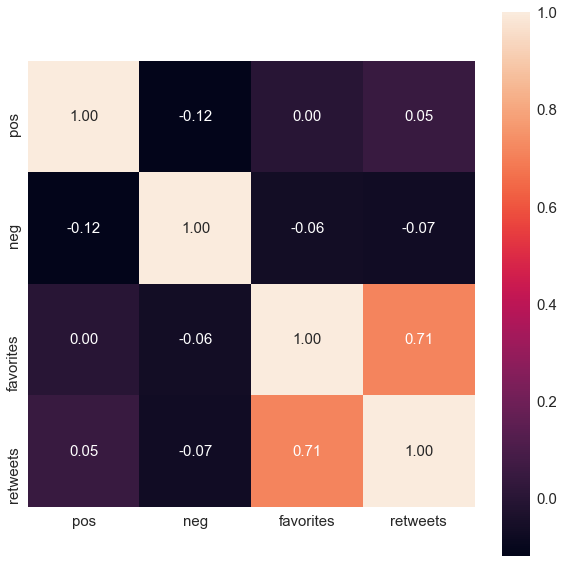

In [20]:
import seaborn as sns
import numpy as np

from IPython.core.display import HTML 

s = f"""<h3> Perjudica o beneficia ser positivo para obtener retweets/favorites : </h3>"""
display(HTML(s))

cols = [ 'pos', 'neg' ,'favorites', 'retweets',]

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

In [18]:
df.describe()

,compound,neg,neu,pos,retweets,favorites
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.313037,0.021739,0.855534,0.122740,0.735714,1.914286
std,0.379187,0.055419,0.131019,0.125516,1.752214,5.559003
min,-0.832800,0.000000,0.278000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.769000,0.000000,0.000000,0.000000
50%,0.340000,0.000000,0.868000,0.112000,0.000000,0.000000
75%,0.647600,0.000000,1.000000,0.207000,1.000000,2.000000
max,0.975200,0.508000,1.000000,0.722000,18.000000,88.000000


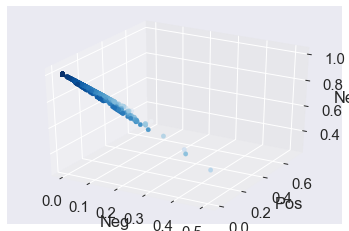

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')


ax.set_xlabel('Neg')
ax.set_ylabel('Pos')
ax.set_zlabel('Neu')
ax.scatter3D(df.neg.values, df.pos.values, df.neu.values, c=df.neu.values, cmap='Blues');

## Resultados

Depende del hashtag veremos mas resultados mas positivos, negativos o neutros.

## Conclusion

Estudiando y monitorizando el sentiment analisys, podemos entender y mejorar nuestro posicionamiento en las redes sociales.
